In [5]:
ls ../runs/second-run/runtime_models

AGSO_model.pkl         NGA_model.txt          SIO_model.pkl
AGSO_model.txt         NGDC_model.pkl         SIO_model.txt
JAMSTEC_model.pkl      NGDC_model.txt         US_multi_model.pkl
JAMSTEC_model.txt      NOAA_geodas_model.pkl  US_multi_model.txt
NGA_model.pkl          NOAA_geodas_model.txt


In [28]:
features = '''00 LAT                                	151.46563
01 LONG                               	-9.89855
02 DEPTH                              	-876
03 pred                               	-943
04 d10                                	1
05 d20                                	1
06 d60                                	0.991437762579
07 age                                	39.3703424623
08 VGG                                	56.1061734039
09 rate                               	5154.39169575
10 sed                                	63.5567064532
11 rough                              	67.7707684862
12 G:T                                	0.744597200561
13 kind                               	M
14 year                               	2000
15 NDP_2.5                            	223.13974293
16 NDP_5                              	1129.34403636
17 NDP_10                             	5682.76607046
18 NDP_30                             	29711.2701283
19 STD_2.5m                           	129.895390742
20 STD_5m                             	294.16470537
21 STD_10m                            	557.675535108
22 STD_30m                            	760.18723492
23 MED_2.5m                           	-1124.45725057
24 MED_5m                             	-1243.61437728
25 MED_10m                            	-2054.68489678
26 MED_30m                            	-1861.12574356
27 DEPTH-MED_2.5m)/STD_2.5m           	1.91275
28 (DEPTH-MED_5m)/STD_5m              	1.24969
29 (DEPTH-MED_10m)/STD_10m            	2.11357
30 (DEPTH-MED_30m)/STD_30m            	1.2959'''.split('\n')
features = [s.split()[1] for s in features]

In [19]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

base_path = "../runs/second-run"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

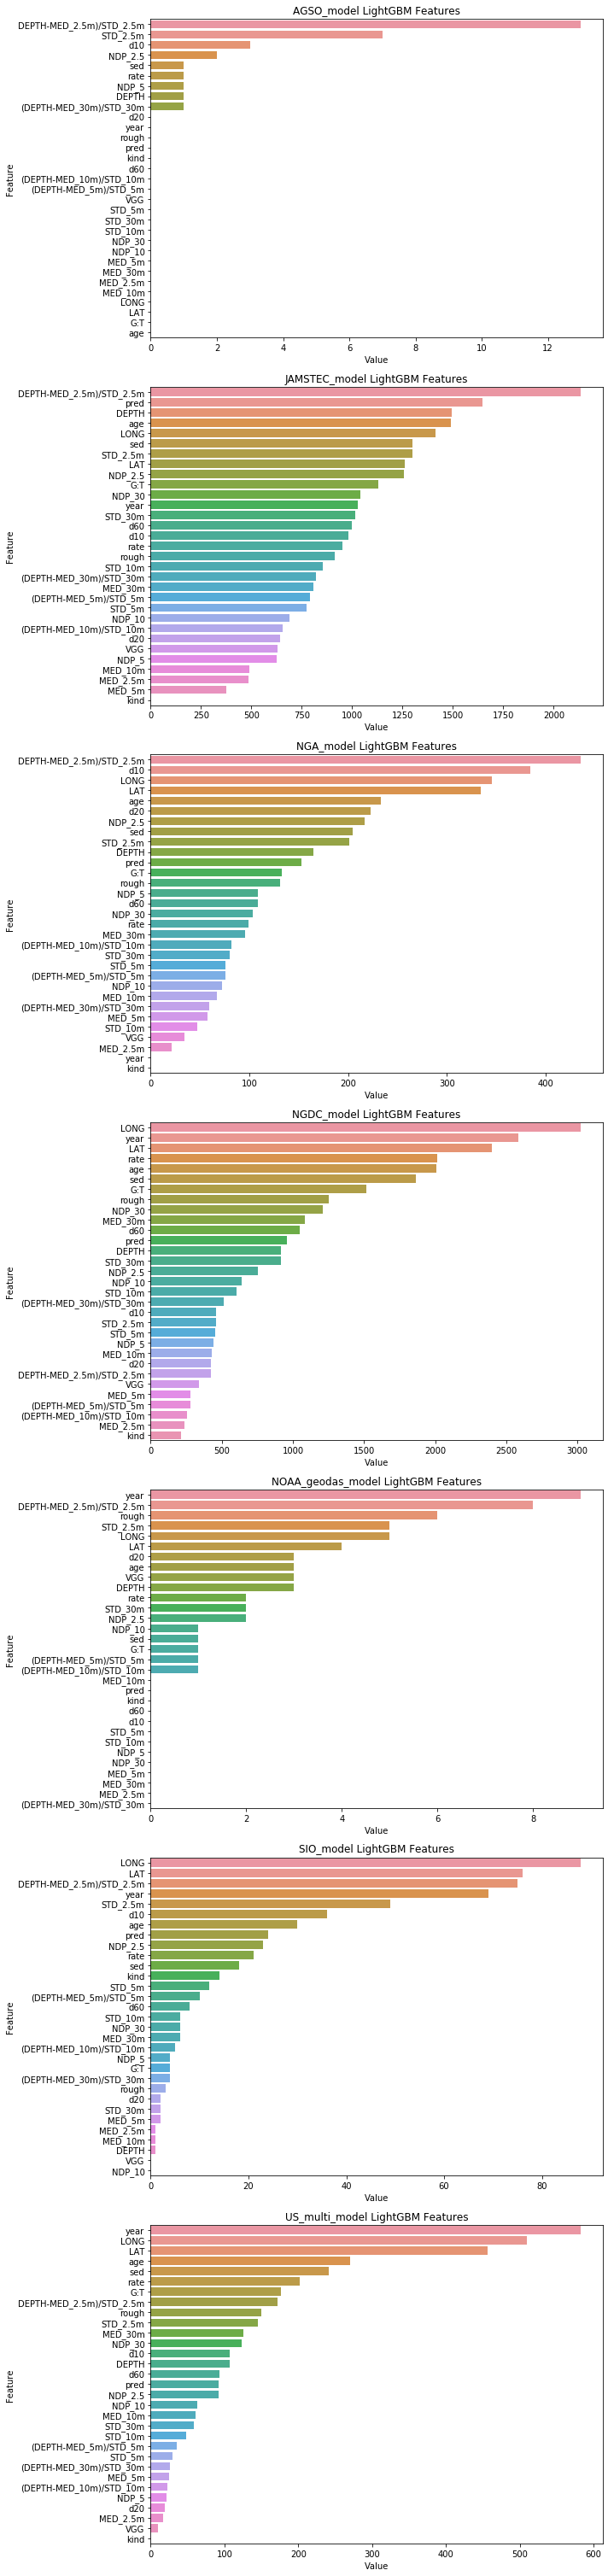

In [40]:
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='split'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()